<a href="https://colab.research.google.com/github/mevangelista-alvarado/Python_Notas/blob/master/Read_data_from_web_with_GeoPandas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

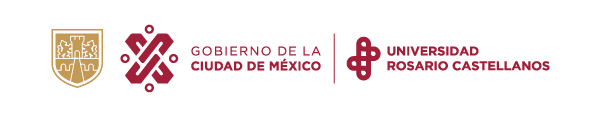

**Actualizado:** Octubre de 2023

**Autor:** Miguel Evangelista ([@mevagelista-alvarado](https://github.com/mevangelista-alvarado))

### Descargando un archivo zip del INEGI

In [1]:
!wget http://internet.contenidos.inegi.org.mx/contenidos/Productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463142683_s.zip

--2023-10-04 23:04:22--  http://internet.contenidos.inegi.org.mx/contenidos/Productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463142683_s.zip
Resolving internet.contenidos.inegi.org.mx (internet.contenidos.inegi.org.mx)... 200.23.8.220
Connecting to internet.contenidos.inegi.org.mx (internet.contenidos.inegi.org.mx)|200.23.8.220|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204499778 (195M) [application/x-zip-compressed]
Saving to: ‘889463142683_s.zip’

889463142683_s.zip  100%[===================>] 195.03M  1.88MB/s    in 1m 45s  

2023-10-04 23:06:08 (1.85 MB/s) - ‘889463142683_s.zip’ saved [204499778/204499778]



In [2]:
import zipfile

path_to_zip_file = '/content/889463142683_s.zip'
directory_to_extract_to = '/content'

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)


## Create a MX municipality dataframe

### Download geopandas module

In [3]:
!pip install geopandas

In [4]:
import geopandas as gpd
from itertools import zip_longest

# Read shp file and convert as dataframe
path_file = "/content/conjunto_de_datos/areas_geoestadisticas_municipales.shp"
df = gpd.read_file(path_file)

In [5]:
df

,CVE_ENT,CVE_MUN,NOM_MUN,geometry
0,01,002,Asientos,"POLYGON ((2494680.261 1141224.506, 2494749.948..."
1,01,011,San Francisco de los Romo,"POLYGON ((2471901.164 1118837.535, 2471903.404..."
2,01,007,Rincón de Romos,"POLYGON ((2476760.231 1150329.046, 2476783.634..."
3,01,008,San José de Gracia,"POLYGON ((2453254.179 1144800.521, 2453326.553..."
4,01,005,Jesús María,"POLYGON ((2466710.861 1102163.965, 2466673.583..."
...,...,...,...,...
2453,15,090,Tenango del Valle,"POLYGON ((2743083.476 786424.291, 2739761.694 ..."
2454,15,106,Toluca,"POLYGON ((2755061.203 812050.970, 2754957.762 ..."
2455,15,058,Nezahualcóyotl,"POLYGON ((2808770.826 829364.660, 2808809.767 ..."
2456,09,005,Gustavo A. Madero,"POLYGON ((2804455.193 837639.057, 2804458.490 ..."


<Axes: >

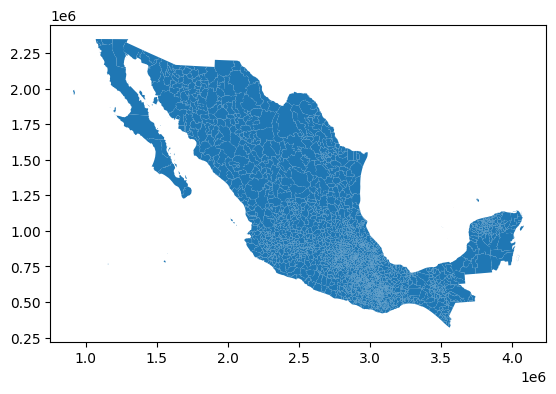

In [6]:
df.plot()

In [7]:
aguascalientes_df = df[df["CVE_ENT"].isin(["09"])]
aguascalientes_df

,CVE_ENT,CVE_MUN,NOM_MUN,geometry
265,09,010,Álvaro Obregón,"POLYGON ((2792859.255 815015.440, 2792850.164 ..."
266,09,012,Tlalpan,"POLYGON ((2803827.389 814493.672, 2803835.654 ..."
267,09,015,Cuauhtémoc,"POLYGON ((2800483.029 832381.312, 2800517.052 ..."
268,09,017,Venustiano Carranza,"POLYGON ((2802603.341 831349.500, 2802657.676 ..."
269,09,011,Tláhuac,"POLYGON ((2814410.152 806558.306, 2814379.579 ..."
270,09,002,Azcapotzalco,"POLYGON ((2791951.814 837586.813, 2791955.363 ..."
271,09,003,Coyoacán,"POLYGON ((2801514.816 820735.691, 2801516.200 ..."
272,09,013,Xochimilco,"POLYGON ((2803811.513 814080.282, 2803814.355 ..."
273,09,004,Cuajimalpa de Morelos,"POLYGON ((2787229.791 825329.285, 2787272.744 ..."
274,09,016,Miguel Hidalgo,"POLYGON ((2794075.123 832593.225, 2794073.961 ..."


<Axes: >

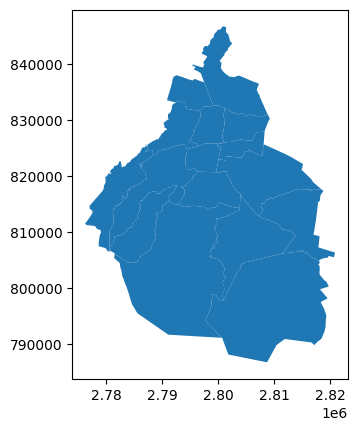

In [8]:
aguascalientes_df.plot()

In [9]:
df["representative_point"] = [e for e in df.representative_point()]

In [10]:
df

,CVE_ENT,CVE_MUN,NOM_MUN,geometry,representative_point
0,01,002,Asientos,"POLYGON ((2494680.261 1141224.506, 2494749.948...",POINT (2490227.1556430208 1123688.5025000027)
1,01,011,San Francisco de los Romo,"POLYGON ((2471901.164 1118837.535, 2471903.404...",POINT (2474136.262425001 1111545.6511500077)
2,01,007,Rincón de Romos,"POLYGON ((2476760.231 1150329.046, 2476783.634...",POINT (2464187.115421223 1136435.6413499974)
3,01,008,San José de Gracia,"POLYGON ((2453254.179 1144800.521, 2453326.553...",POINT (2445591.74062189 1124924.8591500036)
4,01,005,Jesús María,"POLYGON ((2466710.861 1102163.965, 2466673.583...",POINT (2451827.284163108 1101987.1646500006)
...,...,...,...,...,...
2453,15,090,Tenango del Valle,"POLYGON ((2743083.476 786424.291, 2739761.694 ...",POINT (2748130.7887805197 788851.9467000011)
2454,15,106,Toluca,"POLYGON ((2755061.203 812050.970, 2754957.762 ...",POINT (2745990.0066747544 811206.1336500011)
2455,15,058,Nezahualcóyotl,"POLYGON ((2808770.826 829364.660, 2808809.767 ...",POINT (2810479.79409582 829264.3756500138)
2456,09,005,Gustavo A. Madero,"POLYGON ((2804455.193 837639.057, 2804458.490 ...",POINT (2798696.5476752543 838646.6009999709)
